# RL for RA

In [1]:
from warnings import simplefilter 
simplefilter(action='ignore', category=FutureWarning)

from gym_reachability import gym_reachability  # Custom Gym env.
import gym
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import torch
from collections import namedtuple

from KC_DQN.DDQN import DDQN
from KC_DQN.config import dqnConfig

33333 120


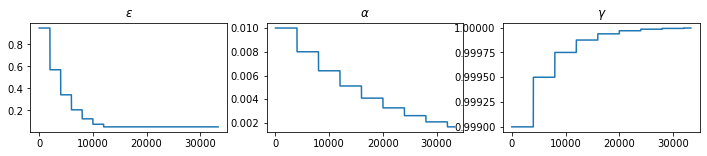

In [2]:
#== CONFIGURATION ==
toEnd = True
env_name = "zermelo_kc-v0"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
maxAccess = 20e5
maxSteps = 120
if toEnd:
    maxEpisodes = int(maxAccess / maxSteps * 2)
else:
    maxEpisodes = 60000
update_period = int(maxEpisodes / 10)

CONFIG = dqnConfig(DEVICE=device, ENV_NAME=env_name, 
                   MAX_EPISODES=maxEpisodes, MAX_EP_STEPS=maxSteps,
                   BATCH_SIZE=100, MEMORY_CAPACITY=10000,
                   GAMMA=.999, GAMMA_PERIOD=4000,
                   EPS_PERIOD=2000, EPS_DECAY=0.6,
                   LR_C=1e-2, LR_C_PERIOD=4000, LR_C_DECAY=0.8)
'''
for key, value in CONFIG.__dict__.items():
    if key[:1] != '_': print(key, value)
'''
#== REPORT ==
print(CONFIG.MAX_EPISODES, CONFIG.MAX_EP_STEPS)
fig, ax = plt.subplots(1, 3, figsize=(12,2))

eps = np.zeros(CONFIG.MAX_EPISODES)
lr = np.zeros(CONFIG.MAX_EPISODES)
gamma = np.zeros(CONFIG.MAX_EPISODES)
eps_tmp = CONFIG.EPSILON
lr_tmp = CONFIG.LR_C
gamma_tmp = CONFIG.GAMMA
for i in range(CONFIG.MAX_EPISODES):
    if i != 0 and i % CONFIG.EPS_PERIOD == 0:
        eps_tmp = max(eps_tmp*CONFIG.EPS_DECAY, 0.05)
    if i != 0 and i % CONFIG.LR_C_PERIOD == 0:
        lr_tmp *= CONFIG.LR_C_DECAY
    if i != 0 and i % CONFIG.GAMMA_PERIOD == 0:
        gamma_tmp = min(1-(1-gamma_tmp)*CONFIG.GAMMA_DECAY, 0.999999)
    eps[i] = eps_tmp
    lr[i] = lr_tmp
    gamma[i] = gamma_tmp
ax[0].plot(np.arange(CONFIG.MAX_EPISODES), eps)
ax[1].plot(np.arange(CONFIG.MAX_EPISODES), lr)
ax[2].plot(np.arange(CONFIG.MAX_EPISODES), gamma)
ax[0].set_title(r'$\epsilon$')
ax[1].set_title(r'$\alpha$')
ax[2].set_title(r'$\gamma$')
plt.show()

In [3]:
# == Environment ==
if toEnd:
    env = gym.make(env_name, device=device, mode='RA', doneType='toEnd')
else:
    env = gym.make(env_name, device=device, mode='RA')
env.set_costParam(scaling=1.)

# == Discretization ==
grid_cells = (41, 121)
num_states = np.cumprod(grid_cells)[-1]
state_bounds = env.bounds
env.set_discretization(grid_cells, state_bounds)
print(env.spec.id)

s_dim = env.observation_space.shape[0]
action_num = env.action_space.n
print(s_dim, action_num)

action_list = np.arange(action_num)

zermelo_kc-v0
2 3


/Users/kaichieh/anaconda3/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Warmup Buffer [2000] --- Warmup Buffer Ends
Ep[  0 - (0.95,0.999000,1.0e-02)]: Running/Real cost: -1.00/-10.00; 


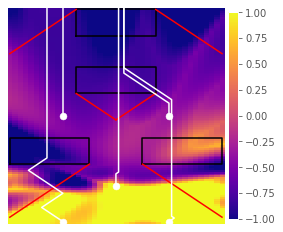

Ep[1666 - (0.95,0.999000,1.0e-02)]: Running/Real cost: -2.11/-15.00; 


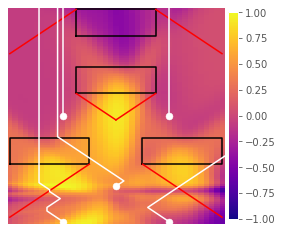

After [100000] accesses, success/failure/unfinished ratio: 0.217, 0.782, 0.000
Ep[3332 - (0.57,0.999000,1.0e-02)]: Running/Real cost: 0.62/0.00; 


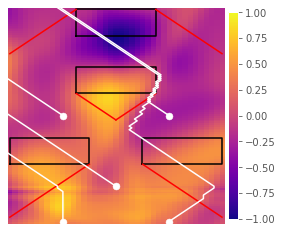

After [200000] accesses, success/failure/unfinished ratio: 0.260, 0.741, 0.000
Ep[4998 - (0.34,0.999500,8.0e-03)]: Running/Real cost: -2.56/-15.00; 


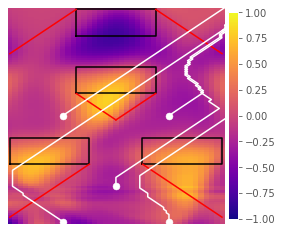

After [300000] accesses, success/failure/unfinished ratio: 0.160, 0.840, 0.000
Ep[6664 - (0.21,0.999500,8.0e-03)]: Running/Real cost: -5.42/-2.00; 


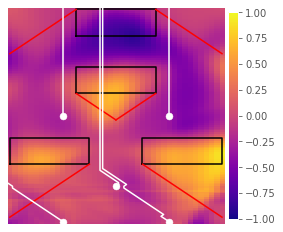

After [400000] accesses, success/failure/unfinished ratio: 0.393, 0.607, 0.000
Ep[8330 - (0.12,0.999750,6.4e-03)]: Running/Real cost: -7.19/-15.00; 


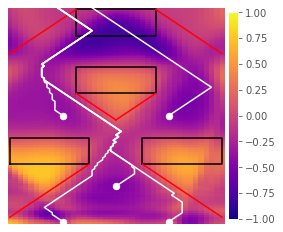

After [500000] accesses, success/failure/unfinished ratio: 0.602, 0.398, 0.000
Ep[9996 - (0.12,0.999750,6.4e-03)]: Running/Real cost: -4.01/-6.00; 


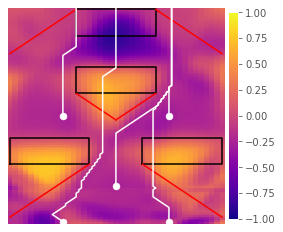

After [600000] accesses, success/failure/unfinished ratio: 0.633, 0.367, 0.000
Ep[11662 - (0.07,0.999750,6.4e-03)]: Running/Real cost: -10.92/-8.00; 


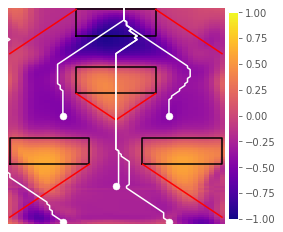

After [700000] accesses, success/failure/unfinished ratio: 0.346, 0.653, 0.000
Ep[13328 - (0.05,0.999875,5.1e-03)]: Running/Real cost: -10.72/-13.00; 


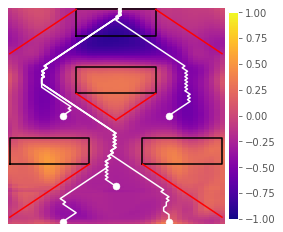

After [800000] accesses, success/failure/unfinished ratio: 0.290, 0.710, 0.000
Ep[14994 - (0.05,0.999875,5.1e-03)]: Running/Real cost: -6.61/-2.00; 


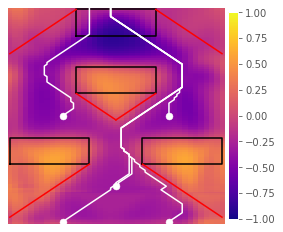

After [900000] accesses, success/failure/unfinished ratio: 0.511, 0.489, 0.000
Ep[16660 - (0.05,0.999938,4.1e-03)]: Running/Real cost: -6.90/-10.00; 


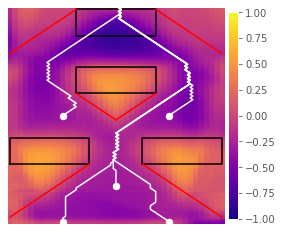

After [1000000] accesses, success/failure/unfinished ratio: 0.564, 0.436, 0.000
Ep[18326 - (0.05,0.999938,4.1e-03)]: Running/Real cost: -10.49/-9.00; 


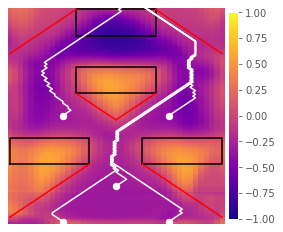

After [1100000] accesses, success/failure/unfinished ratio: 0.685, 0.315, 0.000
Ep[19992 - (0.05,0.999938,4.1e-03)]: Running/Real cost: -8.99/-4.00; 


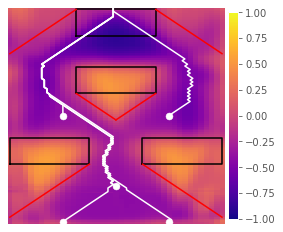

After [1200000] accesses, success/failure/unfinished ratio: 0.656, 0.344, 0.000
Ep[21658 - (0.05,0.999969,3.3e-03)]: Running/Real cost: -10.67/-13.00; 


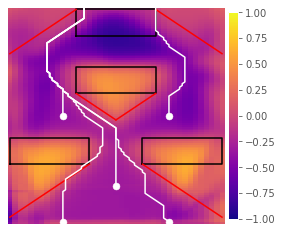

After [1300000] accesses, success/failure/unfinished ratio: 0.642, 0.357, 0.000
Ep[23324 - (0.05,0.999969,3.3e-03)]: Running/Real cost: -12.00/-15.00; 


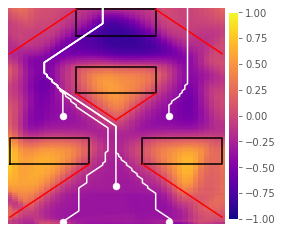

After [1400000] accesses, success/failure/unfinished ratio: 0.630, 0.370, 0.000
Ep[24990 - (0.05,0.999984,2.6e-03)]: Running/Real cost: -9.72/0.00; 


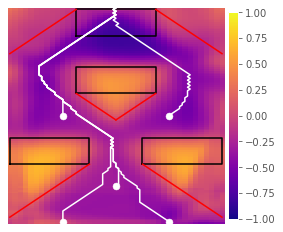

After [1500000] accesses, success/failure/unfinished ratio: 0.644, 0.355, 0.000
Ep[26656 - (0.05,0.999984,2.6e-03)]: Running/Real cost: -10.66/-15.00; 


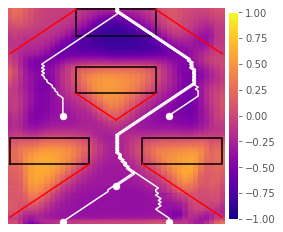

After [1600000] accesses, success/failure/unfinished ratio: 0.653, 0.346, 0.000
Ep[28322 - (0.05,0.999992,2.1e-03)]: Running/Real cost: -10.10/-15.00; 


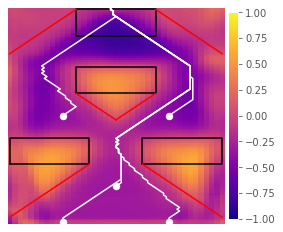

After [1700000] accesses, success/failure/unfinished ratio: 0.676, 0.324, 0.000
Ep[29988 - (0.05,0.999992,2.1e-03)]: Running/Real cost: -7.86/1.00; 


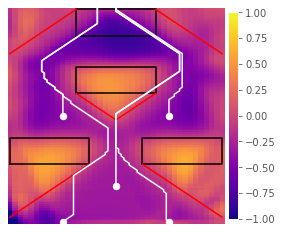

After [1800000] accesses, success/failure/unfinished ratio: 0.650, 0.350, 0.000
Ep[31654 - (0.05,0.999992,2.1e-03)]: Running/Real cost: -12.04/-15.00; 


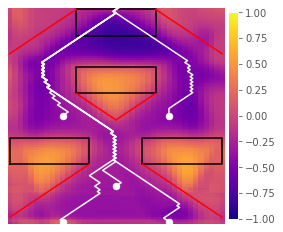

After [1900000] accesses, success/failure/unfinished ratio: 0.613, 0.387, 0.000
Ep[33320 - (0.05,0.999996,1.7e-03)]: Running/Real cost: -11.10/-15.00; 


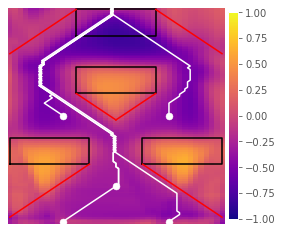

In [4]:
#== AGENT ==
vmin = -1
vmax = 1
report_period = int(update_period / 2)
agent=DDQN(s_dim, action_num, CONFIG, action_list, mode='RA', RA_scaling=1.)
training_records, trainProgress = agent.learn(env, MAX_EPISODES=CONFIG.MAX_EPISODES, MAX_EP_STEPS=CONFIG.MAX_EP_STEPS,
                                              report_period=report_period, vmin=vmin, vmax=vmax, warmupQ=False, toEnd=toEnd)

In [6]:
num_rnd_traj = 2000
_, tmp = env.simulate_trajectories(agent.Q_network, T=200, num_rnd_traj=num_rnd_traj, keepOutOf=False)
#tmp = env.plot_trajectories(agent.Q_network, T=200, num_rnd_traj=num_rnd_traj, keepOutOf=False)
print('successed rate: {:.3f}, failed rate: {:.3f}, unfinished rate: {:.3f}'.format(\
    np.sum(tmp==1)/tmp.shape[0], np.sum(tmp==-1)/tmp.shape[0], np.sum(tmp==0)/tmp.shape[0]))

successed rate: 0.670, failed rate: 0.330, unfinished rate: 0.000


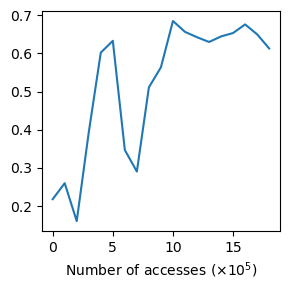

In [13]:
matplotlib.style.use('default')
fig, ax = plt.subplots(1,1,figsize=(3,3))
trainProgress = np.array(trainProgress)
ax.plot(np.arange(trainProgress.shape[0]), trainProgress[:,0])
ax.set_xlabel(r'Number of accesses ($\times10^5$)')
fig.tight_layout()
fig.savefig('figure/RA_toend_train.eps')
plt.show()

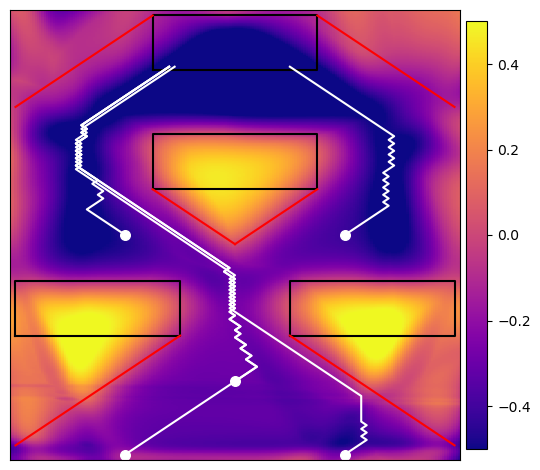

In [14]:
#fig = plt.figure(figsize=(3,3))
env.visualize_analytic_comparison(agent.Q_network, True, vmin=-.5, vmax=.5, nx=201, ny=601, labels=None)
env.plot_reach_avoid_set()
env.plot_trajectories(agent.Q_network, T=150, num_rnd_traj=5, states=env.visual_initial_states)
plt.tight_layout()
plt.savefig('figure/RA_toend.eps')

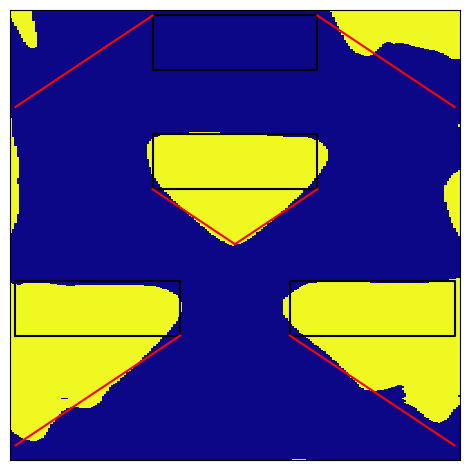

In [15]:
#fig = plt.figure(figsize=(3,3))
env.visualize_analytic_comparison(agent.Q_network, True, vmin=0, vmax=1, boolPlot=True, nx=201, ny=601, labels=None)
env.plot_reach_avoid_set()
plt.tight_layout()
plt.savefig('figure/RA_toend_bool.eps')